In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# CREDIT CARD FRAUD DETECTION

# **Importing important libraries and Dataset**

In [2]:
#importing important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


import warnings

# Suppress a specific warning
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split,GridSearchCV

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**About Dataset**

The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
train_data=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
train_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# **EDA [Exploratory Data Analysis]**


Exploratory Data Analysis (EDA) is the process of visually and statistically exploring the dataset to gain insights, identify patterns, relationships, and anomalies within the data. The primary goal of EDA is to understand the data, identify potential issues or challenges, and inform the subsequent steps of data preprocessing and model building.

**EDA involves the following tasks:**

* Summary Statistics
* Data Visualization
* Handling Missing Data
* Outlier Detection
* Feature Relationships
* Data Distributions

In [4]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
train_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [6]:
train_data.shape

(284807, 31)

In [7]:
train_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observation :** It contains only numerical input variables

In [9]:
train_data['Class'].unique()

array([0, 1])

In [10]:
train_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
# making Hour feature from Time feature
train_data["Hour"] = train_data["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
train_data["Hour"] = train_data["Hour"].astype("int")

In [12]:
#Check the presence of null value
train_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64

**Observation :** No null values present

In [13]:
train_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**0 'Class'** -> True Transaction

**1 'Class'** -> Fraud Transaction

# Data Visualisation

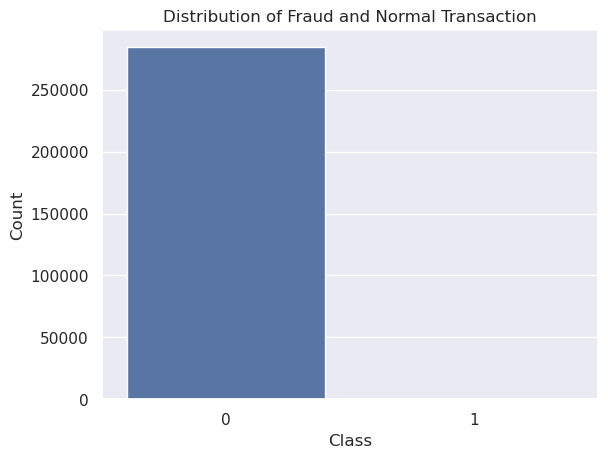

In [14]:
#countplot of sentiment using seaborn
sns.set(style='darkgrid')
sns.countplot(data=train_data, x='Class')
sentiment_counts = train_data['Class'].value_counts()
# Set the plot title and labels
plt.title('Distribution of Fraud and Normal Transaction')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()

In [15]:
# Distribution of Fraud and Normal Transactions


# Custom colors for Normal (0) and Fraud (1) classes
color_discrete_sequence = ['#1E90FF', '#FF4500']

# Create the pie chart using px.pie() and set a different template
fig = px.pie(
    train_data,
    names="Class",
    title="Distribution of Fraud and Normal Transactions: (Normal: 0 | Fraud: 1)",
    color_discrete_sequence=color_discrete_sequence,
    template="seaborn",  # Change the template to "seaborn"
    width=700,
    height=400
)

# Show the pie chart
fig.show()


In [16]:
# correlation matrix
corr = train_data.corr()
corr.style.background_gradient(cmap='summer_r')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
Time,1.000000,0.117396,-0.010593,-0.419618,-0.105260,0.173072,-0.063016,0.084714,-0.036949,-0.008660,0.030617,-0.247689,0.124348,-0.065902,-0.098757,-0.183453,0.011903,-0.073297,0.090438,0.028975,-0.050866,0.044736,0.144059,0.051142,-0.016182,-0.233083,-0.041407,-0.005135,-0.009413,-0.010596,-0.012323,0.301966
V1,0.117396,1.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.227709,-0.101347,0.009576
V2,-0.010593,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.531409,0.091289,-0.018719
V3,-0.419618,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.210880,-0.192961,-0.021597
V4,-0.105260,-0.000000,-0.000000,0.000000,1.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.098732,0.133447,-0.031109
V5,0.173072,0.000000,0.000000,-0.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.386356,-0.094974,-0.033059
V6,-0.063016,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.215981,-0.043643,-0.016437
V7,0.084714,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.397311,-0.187257,-0.004471
V8,-0.036949,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,1.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.103079,0.019875,0.021649
V9,-0.008660,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.044246,-0.097733,-0.173724


**The Pearson correlation coefficient,** often denoted as "r," is a statistical measure that quantifies the linear relationship between two continuous variables. It provides insights into how strongly and in what direction two variables are related. The Pearson correlation coefficient ranges from -1 to +1, with specific interpretations for different values:

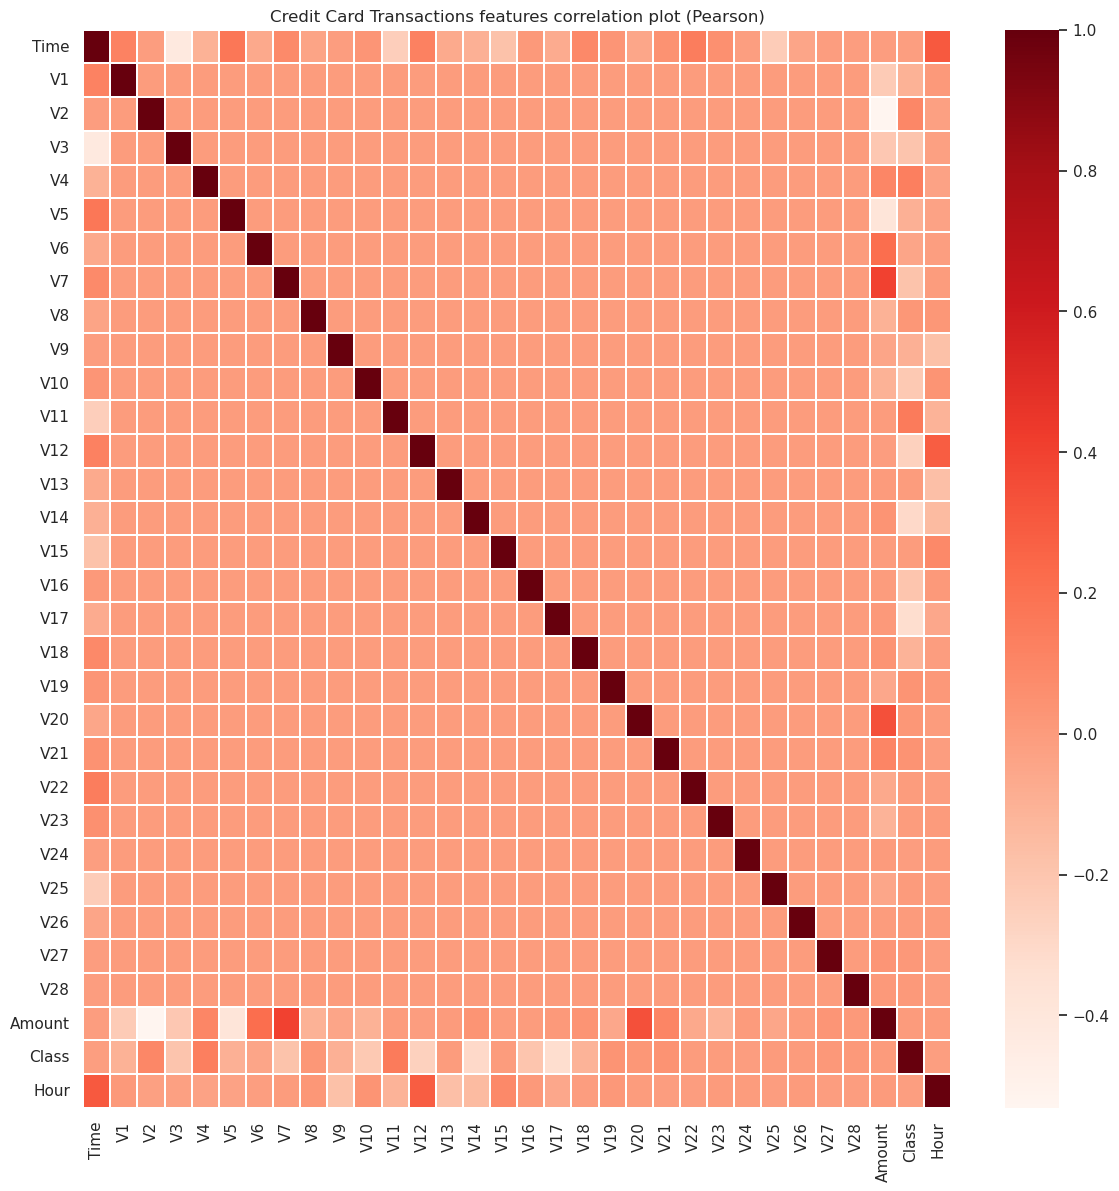

In [17]:
#visualize the Pearson correlation coefficients between different features 
# Set the figure size
plt.figure(figsize=(14, 14))

# Set the title
plt.title('Credit Card Transactions features correlation plot (Pearson)')

# Calculate the correlation matrix
corr = train_data.corr()

# Create the heatmap using seaborn
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="Reds")

# Display the plot
plt.show()

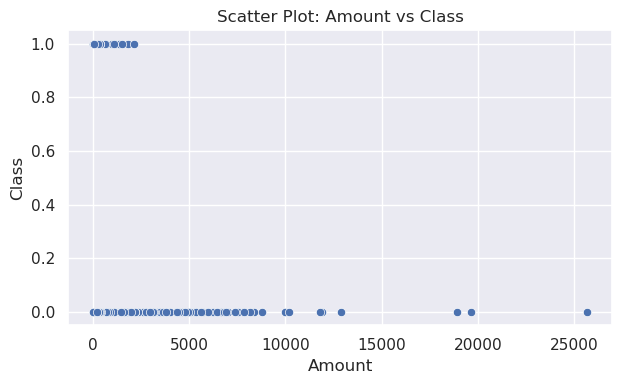

In [18]:
# Set the figure size
plt.figure(figsize=(12, 4))

# Create scatter plot for Amount vs Class
plt.subplot(1, 2, 2)
sns.scatterplot(x='Amount', y='Class', data=train_data)
plt.xlabel('Amount')
plt.ylabel('Class')
plt.title('Scatter Plot: Amount vs Class')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Text(0.5, 1.0, 'Box Plot: Hour vs Class')

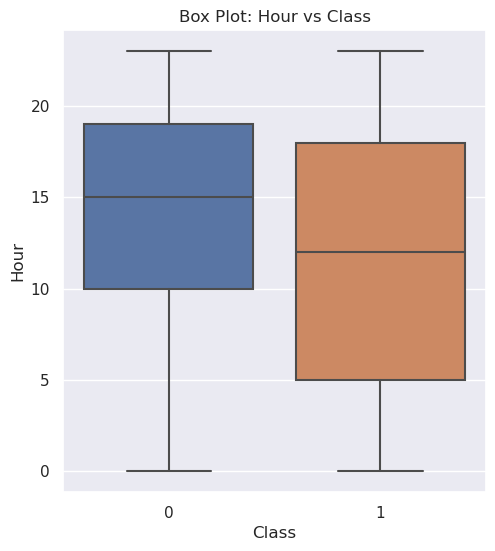

In [19]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create box plot for Hour vs Class
plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Hour', data=train_data)
plt.xlabel('Class')
plt.ylabel('Hour')
plt.title('Box Plot: Hour vs Class')

In [20]:
#creating a subplot to visualize the distribution of transactions (both non-fraudulent and fraudulent) over time (hourly). 
#The x-axis represents the hour, and the y-axis represents the transaction count.
from plotly.subplots import make_subplots

# Calculate the transaction counts for non-fraudulent and fraudulent transactions over time (hour)
count_0 = train_data[train_data['Class'] == 0].groupby('Hour').count()["Class"]
count_1 = train_data[train_data['Class'] == 1].groupby('Hour').count()["Class"]

# Concatenate the counts into a DataFrame
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Non-Frauds", "Frauds"]).fillna(0)
df_counts = counts_df.reset_index()

# Create subplots with titles
fig = make_subplots(rows=1, cols=2, subplot_titles=("Non-Fraudulent Transactions", "Fraudulent Transactions"))

# Add line plots for non-fraudulent and fraudulent transactions
fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Non-Frauds"], name="Non-Frauds", line=dict(color="#1E90FF")),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df_counts["Hour"], y=df_counts["Frauds"], name="Frauds", line=dict(color="#FF4500")),
              row=1, col=2)

# Set axis titles
fig.update_xaxes(title_text="Hour", row=1, col=1)
fig.update_yaxes(title_text="Transaction Count", row=1, col=1)
fig.update_xaxes(title_text="Hour", row=1, col=2)
fig.update_yaxes(title_text="Transaction Count", row=1, col=2)

# Update layout title
fig.update_layout(title_text="Transaction Counts for Non-Fraudulent and Fraudulent Transactions Over Time")

# Show the plot
fig.show()


# **Data Preprocessing**

Data preprocessing is a crucial step in the machine learning workflow that involves cleaning, transforming, and preparing the data to make it suitable for training and building predictive models.

**Some general steps of data preprocessing :**

* Data Cleaning
* Feature Selection
* Feature Engineering
* Data Transformation
* Feature Scaling
* Handling Categorical Data

In [21]:
#Separating dependent and independent columns
X=train_data.drop(columns='Class',axis=1)
y=train_data['Class']

In [22]:
X.shape

(284807, 31)

In [23]:
y.shape

(284807,)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Feature Scaling** : Since we have only numerical data, we can perform feature scaling for better understanding of the dataset by the model.

In [25]:
# standardization of data
sc=StandardScaler()

X_train_processed=sc.fit_transform(X_train)
X_test_processed=sc.transform(X_test)

In [26]:
X_train_processed.shape

(227845, 31)

In [27]:
X_test_processed.shape

(56962, 31)

# **Model Training with Hyper Parameter tuning and Evaluation**

# Logistic Regression Model : 

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc

#Logistic Regression Model
baseline_model = LogisticRegression(max_iter=100)

#Hyperparameter tuning
param_grid = {
    'penalty': ['l2'],  # Regularization type ('l1' = Lasso, 'l2' = Ridge)
    'C': [1]  # Regularization parameter  
}
grid_search = GridSearchCV(baseline_model, param_grid, cv=7)
grid_search.fit(X_train_processed, y_train)
print(grid_search.best_params_)
model1 = grid_search.best_estimator_

# Model evaluation
y_pred = model1.predict(X_test_processed)  

print(model1.score(X_train_processed,y_train))
print(model1.score(X_test_processed,y_test))


{'C': 1, 'penalty': 'l2'}
0.9992275450415853
0.9991222218320986


In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9991222218320986


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: On Logistic Regression Model")
print(conf_matrix)

Confusion Matrix: On Logistic Regression Model
[[56855     9]
 [   41    57]]


In [31]:
print("Classification Report: On Logistic Regression Model")
print(classification_report(y_test, y_pred))

Classification Report: On Logistic Regression Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



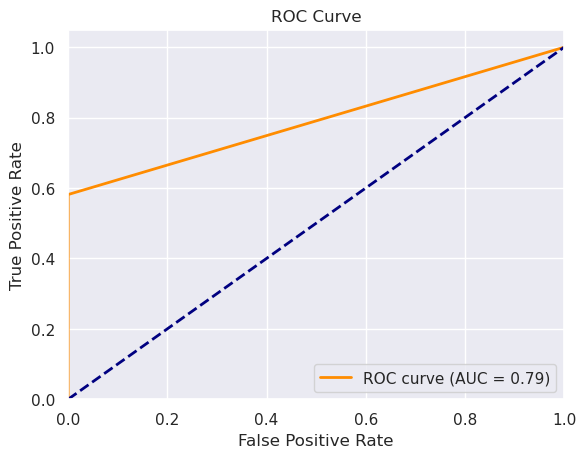

In [33]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Linear SVC model

In [34]:
from sklearn.svm import LinearSVC
# Create an instance of the LinearSVC
linear_svc = LinearSVC()

# Define hyperparameters to tune
param_grid = {
    'C': [1],  
    'penalty': ['l2']
}

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(linear_svc, param_grid, cv=7)
grid_search.fit(X_train_processed, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_

print(best_params)
model1 = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = model1.predict(X_test_processed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(" Model Accuracy:",accuracy)


{'C': 1, 'penalty': 'l2'}
 Model Accuracy: 0.9989642217618764


In [35]:
# Generate a classification report
classification_report = classification_report(y_test, y_pred)
print("Classification Report: on LinearSVC Model")
print(classification_report)

Classification Report: on LinearSVC Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.49      0.62        98

    accuracy                           1.00     56962
   macro avg       0.92      0.74      0.81     56962
weighted avg       1.00      1.00      1.00     56962



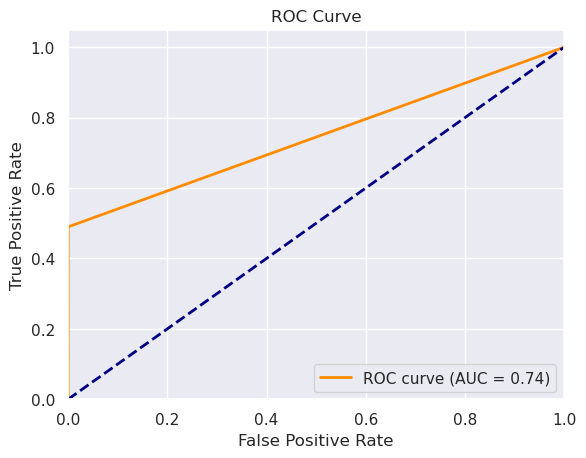

In [36]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# CART Model

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Instantiate the Decision Tree model
tree_model = DecisionTreeClassifier()

# Fit the grid search to your data
tree_model.fit(X_train_processed, y_train)

# Predict on the test data
y_pred=tree_model.predict(X_test_processed)

# Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.9991573329588147


In [38]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: on CART Model")
print(conf_matrix)

Confusion Matrix: on CART Model
[[56835    29]
 [   19    79]]


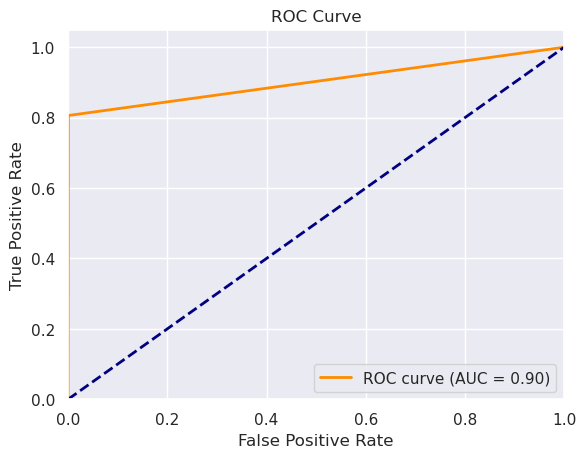

In [39]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Random Forest Classifier Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train_processed, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test_processed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



Accuracy: 1.00


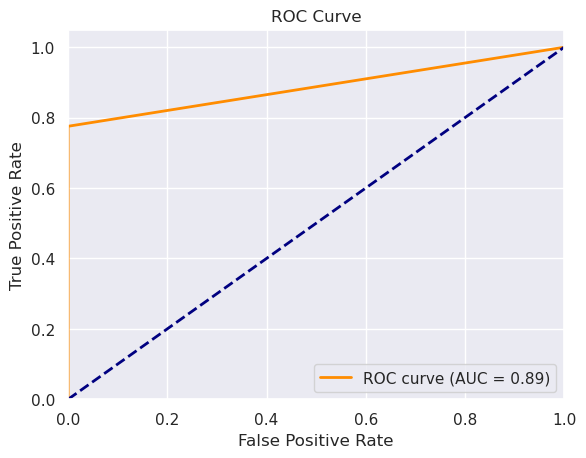

In [41]:
# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Conclusion

**Conclusion :**
I investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated four predictive models. The data was split in 2 parts, a train set and a test set.

I have evaluated the performance of the models using the accuracy score and roc auc score, classification matrix and confusion matrix. The best results were obtained with CART Model, and a accuracy of **0.99915**, auc roc score of **0.90**